# Sample code for ggtree plots
Everytime I have to make a ggtree figure it can take a while to get the figure I want. I often find myself searching through old projects looking for the code I need. Here I'm just going to make some of the common figures I use to save me time in future. It's hosted on github rather than a static page so it can be updated easily with new plots.

In [21]:
packages <- c("ggplot2", "ggtree")
suppressMessages(sapply(packages, require, character.only=T, quietly=T))
options(repr.plot.width=5, repr.plot.height=3)

ggplot2  ggtree 
   TRUE    TRUE

# Clade label and tip points

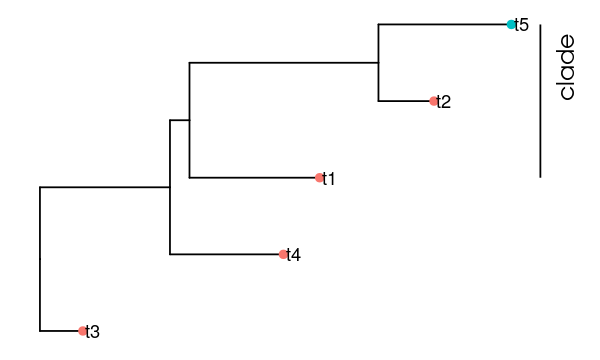

In [23]:
n <- 5
#random tree
tree <- rtree(n)
#Random tree associated data
tad <- data.frame(seq=tree$tip.label, group=rbinom(n=n, size=1, prob=0.5))

#Plot tree
ggtree(tree) %<+% tad + 
#Add tip points, coloured according to data
geom_tippoint(aes(colour=as.factor(group)), size=2)+
#Set font family to match dios theme
geom_cladelabel(node=n+3, label="clade", fontsize=5, family="Avant Garde", angle=90, offset= 0.1, offset.text=0.1) +
#Remove axes from tree plot
theme(axis.line=element_blank(), axis.text=element_blank(), axis.ticks=element_blank())+
geom_tiplab()

In [24]:
tad

seq,group
t3,0
t4,0
t1,0
t2,0
t5,1


# Colour branches
Note that the internal branches have NA in this example, hence they're grey. Note that the legend defaults to missing so you must set the position.

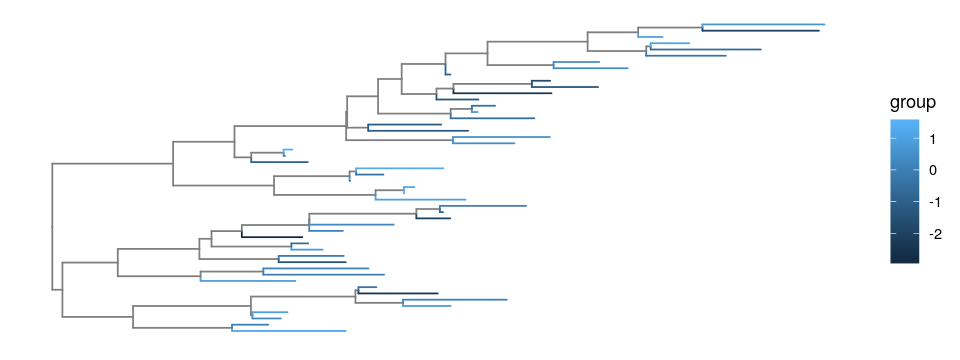

In [14]:
n <- 50
#random tree
tree <- rtree(n)
#Random tree associated data
tad <- data.frame(seq=tree$tip.label, group=rnorm(n))

ggtree(tree, aes(colour=group)) %<+% tad +
theme(legend.position="right")

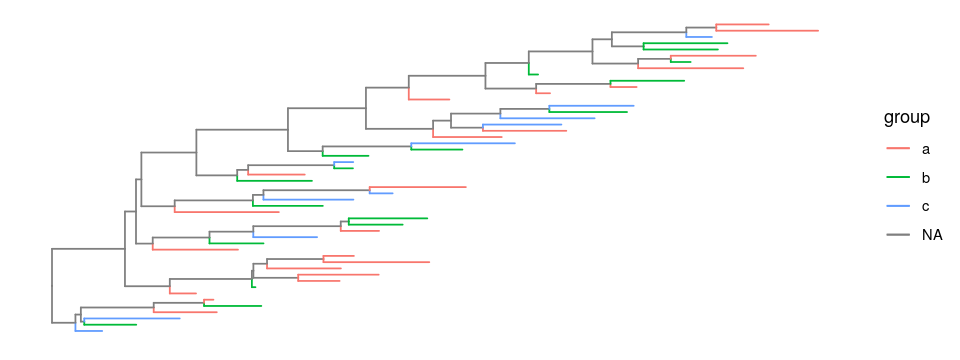

In [20]:
n <- 50
#random tree
tree <- rtree(n)
#Random tree associated data
tad <- data.frame(seq=tree$tip.label, group=sample(c("a","b","c"), n, replace=T))

ggtree(tree, aes(colour=group)) %<+% tad +
theme(legend.position="right")

# Points for some tips

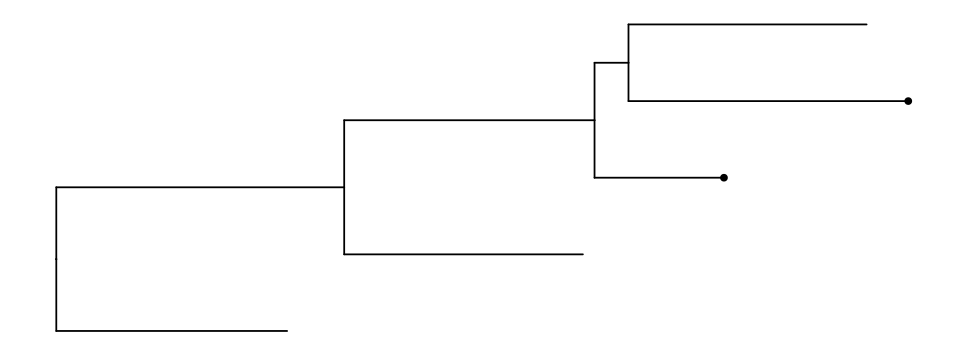

In [16]:
n <- 5
#random tree
tree <- rtree(n)

keeptip <- tree$tip.label %in% c("t2", "t5")
keepnode <- c(keeptip, rep(F, tree$Nnode))

#Plot tree
ggtree(tree)+
#Add tip points, coloured according to data
geom_point2(aes(subset=keepnode))

# Labels for some tips

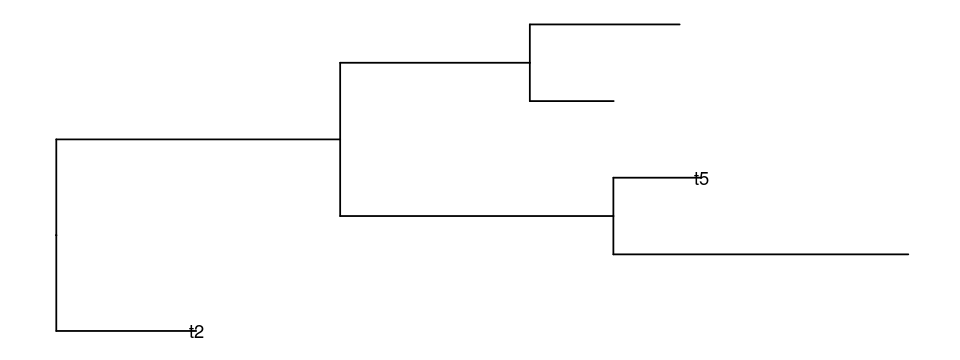

In [15]:
n <- 5
#random tree
tree <- rtree(n)

keeptip <- tree$tip.label %in% c("t2", "t5")
keepnode <- c(keeptip, rep(F, tree$Nnode))

ggtree(tree)+
geom_text2(aes(subset=keepnode), label=tree$tip.label[keepnode])

# `gheatmap`
Requires multiple columns, i.e. you can not add only one variable. A way arround this is to duplicate the desired column and to turn off the lines separating them.
## Continuous heat map

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.


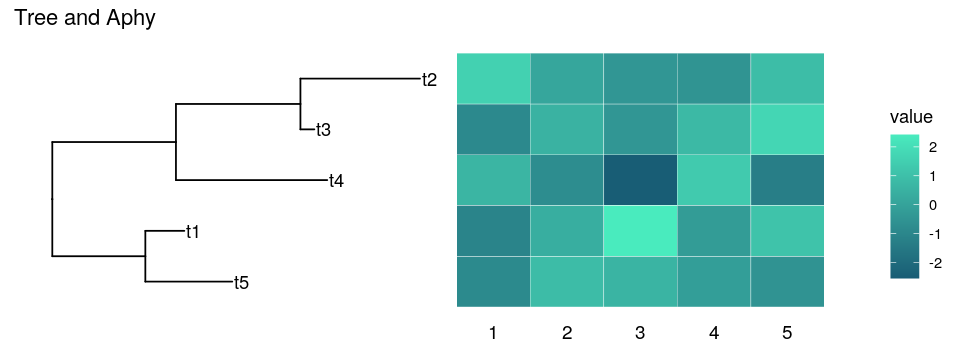

In [6]:
n <- 5
tree<- rtree(n)

Aphy <- matrix(rnorm(n*n), n,n)
colnames(Aphy) <- 1:n
rownames(Aphy) <- tree$tip.lab

gheatmap(
    ggtree(tree) + geom_tiplab() + ggtitle("Tree and Aphy"),
    Aphy
) +
scale_fill_gradientn(colours=c("#185d75", "#49ebbe"))

## Discrete heatmap

Warning message:
“attributes are not identical across measure variables;
they will be dropped”

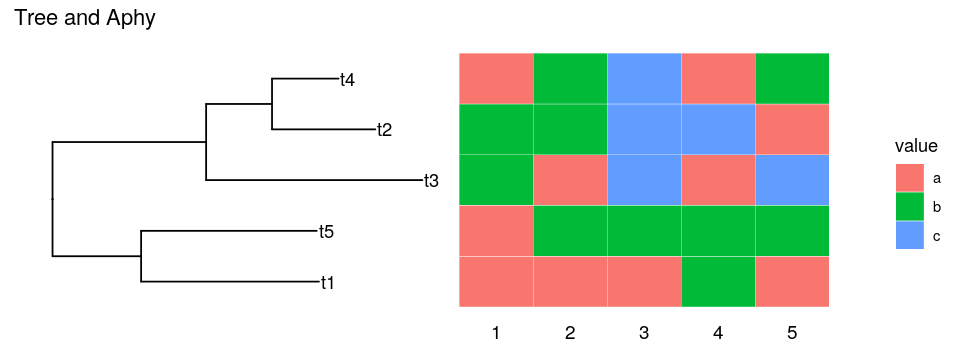

In [5]:
n <- 5
tree<- rtree(n)

Aphy <- matrix(sample(c("a","b","c"), n*n, replace=T), n,n)
colnames(Aphy) <- 1:n
rownames(Aphy) <- tree$tip.lab

gheatmap(
    ggtree(tree) + geom_tiplab() + ggtitle("Tree and Aphy"),
    Aphy
)